__We will use very simple home prices data set to implement batch and stochastic gradient descent in python. Batch gradient descent uses all training samples in forward pass to calculate cumulative error and than we adjust weights using derivatives. In stochastic GD, we randomly pick one training sample, perform forward pass, compute the error and immediately adjust weights. So the key difference here is that to adjust weights batch GD will use all training samples where as stochastic GD will use one randomly picked training sample.__

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv("housing_banglore.csv")
df.shape

(20, 3)

In [3]:
from sklearn import preprocessing
sx =  preprocessing.MinMaxScaler()     # For scaling values in range 0-1
sy =  preprocessing.MinMaxScaler()      # For scaling values in range 0-1
x= df.drop('price', axis = 'columns')   # dropping the last column from x_train
scaled_X = sx.fit_transform(x)
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1)) # df.shape[0] returns number of rows in df.
# type(scaled_X) --> Numpy array
# type(scaled_y) --> Numpy array
# scaled_X.shape --> (20, 2)
# scaled_y.shape --> (20, 1)

## Batch Gradient Descent Function

__Quick Review space of code for batch_gradient_descent(). CAN SKIP THIS PART__

__y_predicted = np.dot(w,X.T) + b ===== QUICK CHECK__

In [4]:
t = (scaled_X.T)

In [5]:
# w = np.ones(shape= (2)).reshape(1,2) #--> Returns shape (1,2)--> 2d array --> y_predicted becomes a 2d array 
w = np.ones(shape= (2)) # Will also work as shape is (2,) --> 1d array with 2 columns. --> y_predicted becomes a 1d array 
# dot matrix for np.dot(w,scaled_X.T) will still be valid as it will be considered as 2 column which satisfies the condition (1, 2)(2, 20) for both above cases
# matrix subtraction for (scaled_y - y_predicted) after reshape above with (20, 1) (1, 20) returns mean 0.2768
# matrix subtraction for (scaled_y - y_predicted.T) after reshape above with (20, 1) (20, 1) after transpose returns mean 0.2768

In [6]:
t.shape

(2, 20)

In [7]:
w.shape

(2,)

In [8]:
w

array([1., 1.])

In [9]:
t

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [10]:
w_check = np.dot(w,scaled_X.T) # (2,)(2, 20)
# we get = w1*x1 + w2*x2  For Matrix dot product (1, 2)(2, 20) is valid
# It is used inside y_predicted = np.dot(w,X.T) + b. Just checking the shape it will return. Neglecting b for now.
w_check.shape
# returns w1x1 + w2x2 

(20,)

__cost = np.mean(np.square(scaled_y- y_predicted))===Quick Check__

In [11]:
scaled_y.shape #2d array. It remains a 2d array only even if w is 2d above.

(20, 1)

In [12]:
b = 0
y_predicted = np.dot(w,scaled_X.T) + b
y_predicted.shape #1d array
# y_predicted

(20,)

In [13]:
# scaled_y shape is (20, 1). Converting it to (20,) for matrix subtraction in cost function.
scaled_y_new = scaled_y.reshape(scaled_y.shape[0],) 
# converting 2d to 1d array to match the input dim of y_predicted. 
# It is used inside cost function matrix subtraction. cost = np.mean(np.square(scaled_y- y_predicted))
#  scaled_y and y_predicted shape should be (20,) for matrix subtraction.
scaled_y_new.shape 

(20,)

In [14]:
n= scaled_X.shape[0]
cost1 = (1/n) * sum ([val**2 for val in (scaled_y_new - y_predicted)]) # use this when w is 1d above. For 2d if this is used it returns a wrong value. But same subtraction matrix if used in numpy for 2d, returns a correct answer.Refer below cell.
# cost1 = (1/n) * sum ([val**2 for val in (scaled_y - y_predicted.T)]) #use this when w is 2d above 
# cost1 = ([val**2 for val in (scaled_y - y_predicted)]) # AttributeError: 'list' object has no attribute 'shape'
cost1 = np.mean(cost1) # Returns correct answer in digit. But np.mean is required. Else cost1 above will return numpy array. 
# cost1.shape
# type(cost1)
cost1

0.2768777174681

Observe how numpy accepts [(20,) - (1, 20)] below for 1d, when x is 2d , while plain code returns a false value. Correct value for cost is 0.2768777174681. 

In [15]:
cost2 = scaled_y_new - y_predicted # use this when w is 1d above 
# cost2 = scaled_y - y_predicted.T  #use this when w is 2d above
cost2.shape
# cost2 = np.mean(np.square(cost2))
# cost2

(20,)

In [16]:
scaled_X.T.shape

(2, 20)

In [17]:
scaled_y.shape

(20, 1)

In [18]:
scaled_y_new.shape

(20,)

In [19]:
y_predicted.shape

(20,)

In [20]:
w_grad = -(2/n)*(np.dot(scaled_X.T,(scaled_y_new - y_predicted))) # Error solved.Use when w is 1d. 
# w_grad = -(2/n)*(np.dot(scaled_X.T,(scaled_y - y_predicted.T))) # use this when w is 2d above 
w_grad # 
# w_grad.shape # will return 1d if w is 1d. Will return 2d if w is 2d. 

array([0.44868254, 0.55434464])

In [21]:
w_check = w - 0.01*w_grad
w_check

array([0.99551317, 0.99445655])

In [22]:
scaled_y.shape # This 2d array was causing errors in matrix subtraction.

(20, 1)

In [23]:
w.shape

(2,)

In [24]:
scaled_y_new.shape

(20,)

In [25]:
y_predicted.shape

(20,)

__Whenever you want to multiply and add things just use a dot product. Make sure they satisfy the matrix requirement.Use transpose where needed to achieve the correct form.__

__Also in matrix subtraction make sure that both matrix are of the same order and dimension i.e subtract 1d array from 1d array only for correct answers__

(anything,same),(same,anything)

In [26]:
def batch_gradient_descent(X,y,epochs,rate):
    number_of_features = X.shape[1]                  #Returns the no. of columns value of X_train. In this case 2.
#     w = np.ones(shape= (2)).reshape(1,2) #Alternative/Better understanding of below code. 
#     w = np.ones(shape= (number_of_features)).reshape(1,number_of_features) #Supply y as 2d array as y predicted becomed 2d array. 
    w = np.ones(number_of_features)                  # supply y as 1d array as y_predicted becomes 1d array for matrix subtraction.
    b = 0
    n= X.shape[0]                                    #Returns the no. of rows value of X_train. In this case 2. 
    cost_list = []
    epoch_list = []
    for i in range (epochs):

        y_predicted = np.dot(w,X.T) + b              # y = w1x1 + w2x2 + b-->Generating (w1x1 + w2x2) using matrix multiplication
#         w1 = -(2/n)*sum(x1*(y - y_predicted))      # Initially we used to find the weights separately which was not generic
#         w2 = -(2/n)* sum (x2*(y - y_predicted))    # We do not know the number of weights. So automating is required. 
        w_grad = -(2/n)*(np.dot(X.T,(y - y_predicted))) # Finding the combined weights w1 and w2 using partial derivative
        b_grad = -(2/n)* sum (y - y_predicted)       # partial derivation of error wrt b
        
        w = w - rate*w_grad
        b = b - rate*b_grad
        
#         cost = np.mean((1/n) * sum ([val**2 for val in (y - y_predicted)])) #Alternative.Matrix multiplication not required. But we can still use numpy for faster calculations and shortening of code. 
        cost = np.mean(np.square(y - y_predicted))  #Make sure y and y_predicted are of same dimension/shape
        
        if i%10== 0:
            cost_list.append(cost)
            epoch_list.append(i)
       
    return w,b,cost, cost_list, epoch_list,y_predicted

In [27]:
#  scaled_y.reshape(scaled_y.shape[0],) can be used in above function to avoid manual reshaping of 2d y to 1d y.
w,b,cost, cost_list, epoch_list,y_pred = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],) ,epochs = 500, rate = 0.01)
w,b,cost,y_pred

(array([0.70712464, 0.67456527]),
 -0.23034857438407427,
 0.0068641890429808105,
 array([ 6.16654134e-04,  7.14559478e-01,  2.62958656e-01,  2.82713765e-01,
         3.57368475e-02,  2.84201406e-02,  7.46752989e-01,  8.85282640e-01,
         2.31252926e-01,  1.15152689e+00,  3.50759140e-01,  7.59679171e-01,
        -1.30411988e-02,  1.13478243e-02,  4.60509744e-01,  2.96395917e-02,
         1.99547196e-01,  2.87347679e-01,  5.87332664e-01, -2.30507398e-01]))

__Quick info : scaled_y.reshape(scaled_y.shape[0],)  which is 1d array is used instead of scaled_y which is a 2d array inside batch_gradient_descent() for correct order of matrix subtraction in (y - y_predicted). y_predicted is a 1d array.__

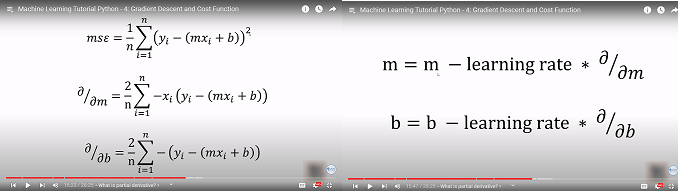

__Plotting graph for batch_gradient_descent__

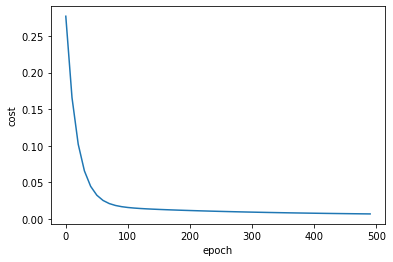

In [28]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

Observe that for batch gradient descent cost vs epoch curve is a smooth line. The cost is exponentially dropped during first few iterations and later the drop is slowed down.

In [29]:
# Generating transformed values of x1 and x2.
# scale_X = sx.transform([[2600,4]]) # Expects a 2d array as arguement. Generally dataframe. Returns shape (1, 2) --2d array
scale_X = sx.transform([[2600,4]])[0] # Returns shape (2,) 1d array.
scale_X

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([0.62068966, 0.75      ])

In [30]:
scale_X.shape

(2,)

In [31]:
w # Weights we got from above SGD function

array([0.70712464, 0.67456527])

In [32]:
w[0]

0.707124642770257

In [33]:
scale_X[0]

0.6206896551724137

In [34]:
w[1]

0.6745652664894097

In [35]:
scale_X[1]

0.75

In [36]:
y_predict = w[0]*scale_X[0] + w[1]*scale_X[1] +b
y_predict

0.7144803261679701

Inverse transform expects a 2d array. Returns a 2d array.

In [37]:
# Just for checking
sy.inverse_transform([[1,0]]) # Reverses the transform process and returns the actual values.

array([[167.,  32.]])

In [38]:
y_pred.shape #Is a 1d array. So adding extra [DIMENSION] inside inverse_transform  

(20,)

In [39]:
sy.inverse_transform([y_pred]).reshape(20,1) # [] or [[]] depends on scale_x above. Else it will throw an error.2d required.

array([[ 32.08324831],
       [128.46552955],
       [ 67.49941859],
       [ 70.16635827],
       [ 36.82447441],
       [ 35.83671898],
       [132.81165348],
       [151.51315645],
       [ 63.21914502],
       [187.45612963],
       [ 79.35248385],
       [134.55668809],
       [ 30.23943816],
       [ 33.53195629],
       [ 94.16881543],
       [ 36.00134488],
       [ 58.93887145],
       [ 70.79193671],
       [111.28990971],
       [  0.88150124]])

In [110]:
def predict(area,bedrooms,w,b):
    
    scaled_X = sx.transform([[area,bedrooms]])[0] #--> then sy.inverse_transform([[y_predicted]]) RETURNS 1D    
#     scaled_X = sx.transform([[area,bedrooms]]) #--> then sy.inverse_transform([y_predicted]) RETURNS 2D


    y_predicted = w[0]*scaled_X[0] + w[1]*scaled_X[1] +b  #RETURNS () 1D AND RETURNS ([]) FOR 2D

#     Inverse_transform needs y_predicted in 2d as input. Output is the inverse_transformed prediction.(Actual value)
    return sy.inverse_transform([[y_predicted]])[0][0]  #-->1D  when y_predicted RETURNS ().[][] returns 1st row 1st column.
#     return sy.inverse_transform([[y_predicted]])  #-->1D  when y_predicted RETURNS ()
#     return sy.inverse_transform([y_predicted])  #-->2D  when y_predicted RETURNS ([])

#     return y_predicted #Output is the transformed prediction.

# Remember inverse function takes 2d as argument. y_predicted returns 1d array with [value,value] so 1 bracket less in inverse function. 
# Another option is to supply a 1d array of scaled_x using [0] index so that y_predicted returns a single number which we can use as an input to inverse function with [[]] and satisfy its requirement of 2d array

In [41]:
predict(2600,4,w,b)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

## Stochastic Gradient Descent Function
    Initially in Batch Gradient Descent we used to run through each sample once before 1 epoch was completed and weights were adjusted to get the cost.
    In SGD we run through 1 sample every epoch and adjust the weights. So number of epochs defines the sample we went through and the accuracy of the cost we get, after the weights are adjusted. To reach the minimum loss more number of epochs are required to be run as the weights are trained onthe basis of single sample only. 

In [42]:
scaled_X.shape

(20, 2)

In [43]:
type(scaled_X)

numpy.ndarray

In [44]:
scaled_X[5]

array([0.12758621, 0.25      ])

In [45]:
import random
random.randint(0,6)

0

In [46]:
rows = scaled_X.shape[0]

In [109]:
for i in range(0,50):
    num = random.randint(0, rows-1)
    print (num)

18
10
16
5
1
6
13
10
8
1
12
13
3
10
1
8
1
14
6
18
1
13
4
5
17
18
12
11
7
3
13
13
16
0
0
7
14
10
6
16
16
10
1
12
11
11
14
9
15
17


In [48]:
def stochastic_gradient_descent(X,y,epochs,rate):
    number_of_features = X.shape[1]                  #Returns the no. of columns value of X_train. In this case 2.
#     w = np.ones(shape= (2)).reshape(1,2) #Alternative/Better understanding of below code. 
#     w = np.ones(shape= (number_of_features)).reshape(1,number_of_features) #Supply y as 2d array as y predicted becomed 2d array. 
    w = np.ones(number_of_features)                  # supply y as 1d array as y_predicted becomes 1d array for matrix subtraction.
    b = 0
    n= X.shape[0]                                    #Returns the no. of rows value of X_train. In this case 2. 
    
    cost_list = []
    epoch_list = []
    
    for i in range (epochs):                         # Iterating individually for each sample and updating the weights bias and cost.  
        # Returns a single random digit between 0-20. Why n-1? 20th number is assigned 19th index.
        random_indices = random.randint(0,n-1) 
        sample_x = X[random_indices]
        sample_y = y[random_indices]
        
        # The rest of the code from here onwards remain the same as batch gradient descent. 
        #Only difference is that X is replaced with sample_x and y with sample_y
        # sum or np.sum is not required as only 1 sample at a time is considered here.
          
        y_predicted = np.dot(w,sample_x.T) + b              # y = w1x1 + w2x2 + b-->Generating (w1x1 + w2x2) using matrix multiplication
        w_grad = -(2/n)*(np.dot(sample_x.T,(sample_y - y_predicted))) # Finding the combined weights w1 and w2 using partial derivative
        b_grad = -(2/n)*(sample_y - y_predicted)       # partial derivation of error wrt b
        
        # Below line 'sum' is not required as we are considering only one sample at a time here. No need to add any array.
        # b_grad = -(2/n)* sum (sample_y - y_predicted)       # sum or np.sum is not required as 1 sample at at time is considered here.
        
        w = w - rate*w_grad
        b = b - rate*b_grad
 
        cost = np.mean(np.square(sample_y - y_predicted))  #Make sure y and y_predicted are of same dimension/shape
        
        if i%10== 0: # At every 10th iteration record the cost and epoch value.
            cost_list.append(cost)
            epoch_list.append(i)
       
    return w,b,cost, cost_list, epoch_list,y_predicted 
#     return w_sgd,b_sgd,cost_sgd, cost_list_sgd, epoch_list_sgd,y_predicted_sgd 

In [49]:
w_sgd,b_sgd,cost_sgd, cost_list_sgd, epoch_list_sgd,y_predicted_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],) ,epochs = 10000, rate = 0.01)
w_sgd,b_sgd,cost_sgd

(array([0.70592411, 0.67311547]), -0.230602526937409, 0.0033809268361348183)

__Plotting Graph for SGD__

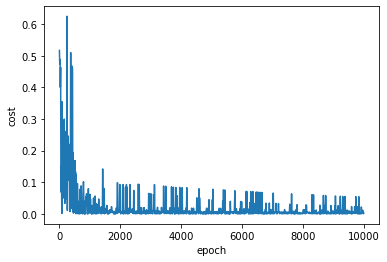

In [50]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

__Using predict() we created above to find the prices by changing w and b__

In [51]:
predict(2600,4,w_sgd,b_sgd) # Notice that the value returned is quite similar to that of Batch GD predicted.

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.17317251652153

## Mini Batch Gradient Descent Function

    In minibatch gradient descent a fix sized batch of any random samples is used for training in 1 epoch. Lets say we have training set of size 20. Then we can pick any 5 samples as batch_size ,then train our model , update weights bias cost and repeat the process.

In [52]:
for i in range (0,len(df),5):
    print (i)

0
5
10
15


__Difference between np.random.permutation() and random.randint() is shown below__

In [95]:
random_per_indices = np.random.permutation(len(df)) # Returns a 1d array of random numbers.
random_per_indices

array([ 6,  7, 14, 11,  5, 15, 16, 10,  3,  8,  4,  9, 17, 12, 13,  1, 19,
       18,  2,  0])

In [96]:
random_int_index = random.randint(0,19) # Returns a single random number.
random_int_index

4

In [97]:
# Checking the numbers returned by randint
list = [] #printing in list to save space else the numbers are printed vertically.
for i in range (0,50):
    random_int_index=random.randint(0,19)
    list.append(random_int_index)
print (list)

[16, 2, 12, 3, 17, 4, 3, 7, 11, 16, 19, 16, 0, 7, 17, 3, 18, 18, 0, 12, 9, 5, 9, 0, 11, 10, 14, 13, 12, 13, 15, 14, 11, 17, 15, 17, 12, 4, 12, 3, 8, 4, 14, 13, 10, 10, 12, 8, 13, 5]


In [98]:
random_indices = np.random.permutation(len(df))
X_tmp = scaled_X[random_indices]
y_tmp = scaled_y[random_indices]

for j in range(0,20,5) Here j prints 4 values 0 5 10 15 if we skip 5 numbers till 20.
initially [j:j+5] will return [0:5] then [5:10] then [10:15] and [15:20]

    for j in range(0,20,batchsize) If batch size exceeds the examples write an if statement to make batchsize = number_of_examples. This way we can avoid errors by restricting the value of batch size to be inside the range of example size. For batch size = 20, j will return only one value 20. Hence the for loop will run once only. [j:j+5] will return [0:0+20] i.e. [0:20]

In [54]:
for j in range(0,len(df),5): 
    print (j)

0
5
10
15


In [55]:
for j in range(0,len(df),5): 
    Xj = X_tmp[j:j+5]
    yj = y_tmp[j:j+5]

In [56]:
Xj

array([[0.68448276, 0.75      ],
       [0.67931034, 0.5       ],
       [0.13103448, 0.5       ],
       [0.12931034, 0.25      ],
       [0.08827586, 0.25      ]])

In [57]:
yj

array([[0.8       ],
       [0.51851852],
       [0.11851852],
       [0.07407407],
       [0.05237037]])

In [176]:
def minibatch_gradient_descent(X,y,epochs,batch_size,rate):
    number_of_features = X.shape[1]                  #Returns the no. of columns value of X_train. In this case 2.
#     w = np.ones(shape= (2)).reshape(1,2) #Alternative/Better understanding of below code. 
#     w = np.ones(shape= (number_of_features)).reshape(1,number_of_features) #Supply y as 2d array as y predicted becomed 2d array. 
    w = np.ones(number_of_features)                  # supply y as 1d array as y_predicted becomes 1d array for matrix subtraction.
    b = 0
    n= X.shape[0]                                    #Returns the no. of rows value of X_train. In this case 2. 
    
    cost_list = []
    epoch_list = []
    
    for i in range (epochs):                                # Iterating for weights and bias 
        random_indices = np.random.permutation(n)           # Generating new indices for x and y
        sample_x = X[random_indices]
        sample_y = y[random_indices]
        
        for j in range(0,len(X),batch_size):   # Dividing into batch and Finding the weights bias and cost for combined batch
            xj = sample_x[j:j+batch_size]
            yj = sample_y[j:j+batch_size]
            
        # The rest of the code from here onwards remain the same as batch gradient descent. Except:
        # Only difference is that X is replaced with xj and y with yj
        # Sum or np.sum is required as batch (array) is selected for matrix calculations. SGD above does not require np.sum (1 example is trained)  
        # b_mbgd will return (5,) 5 outputs if np.sum is not used in b_grad. predict() will throw an error--> ValueError: Found array with dim 3. Estimator expected <= 2.

            y_predicted = np.dot(w,xj.T) + b                  # y = w1x1 + w2x2 + b-->Generating (w1x1 + w2x2) using matrix multiplication
            w_grad = -(2/n)*(np.dot(xj.T,(yj - y_predicted))) # Finding the combined weights w1 and w2 using partial derivative
            b_grad = -(2/n)*np.sum(yj - y_predicted)          # partial derivation of error wrt b.
        
        # Below line 'sum' is not required as we are considering only one sample at a time here. No need to add any array.
        # b_grad = -(2/n)* sum (yj - y_predicted)       # sum or np.sum is not required as 1 sample at at time is considered here.
        
            w = w - rate*w_grad
            b = b - rate*b_grad
 
            cost = np.mean(np.square(yj - y_predicted))  #Make sure y and y_predicted are of same dimension/shape
        
        if i%10== 0: # At every 10th iteration record the cost and epoch value.
            cost_list.append(cost)
            epoch_list.append(i)
       
    return w,b,cost, cost_list, epoch_list,y_predicted 
#     return w_sgd,b_sgd,cost_sgd, cost_list_sgd, epoch_list_sgd,y_predicted_sgd 

In [177]:
w_mbgd,b_mbgd,cost_mbgd, cost_list_mbgd, epoch_list_mbgd,y_predicted_mbgd = minibatch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],) ,120 ,5, 0.01)

w_mbgd,b_mbgd,cost_mbgd

(array([0.80883893, 0.77679609]), -0.30509041722126173, 0.02266380764799694)

In [178]:
w_mbgd.shape

(2,)

In [179]:
b_mbgd.shape

()

__Plotting Graph for Mini Btach GD__

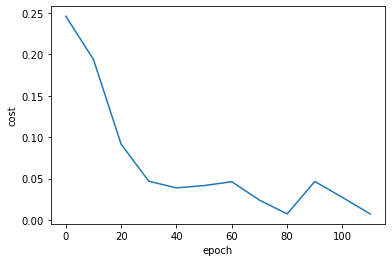

In [186]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_mbgd, cost_list_mbgd)

In [184]:
def predict(area,bedrooms,w,b):
    
    scaled_X = sx.transform([[area,bedrooms]])[0] #--> then sy.inverse_transform([[y_predicted]]) RETURNS 1D    
#     scaled_X = sx.transform([[area,bedrooms]]) #--> then sy.inverse_transform([y_predicted]) RETURNS 2D


    y_predicted = w[0]*scaled_X[0] + w[1]*scaled_X[1] +b  #RETURNS () 1D AND RETURNS ([]) FOR 2D

#     Inverse_transform needs y_predicted in 2d as input. Output is the inverse_transformed prediction.(Actual value)
    return sy.inverse_transform([[y_predicted]])[0][0]  #-->1D  when y_predicted RETURNS ().[][] returns 1st row 1st column.
#     return sy.inverse_transform([[y_predicted]])  #-->1D  when y_predicted RETURNS ()
#     return sy.inverse_transform([y_predicted])  #-->2D  when y_predicted RETURNS ([])

#     return y_predicted #Output is the transformed prediction.

# Remember inverse function takes 2d as argument. y_predicted returns 1d array with [value,value] so 1 bracket less in inverse function. 
# Another option is to supply a 1d array of scaled_x using [0] index so that y_predicted returns a single number which we can use as an input to inverse function with [[]] and satisfy its requirement of 2d array

In [185]:
predict(2600,4,w_mbgd,b_mbgd) # Notice that the value returned is quite similar to that of Batch GD predicted.

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


137.23852219607804